# This notebook is meant to create functions for plotting 

Goal is then to add them to the classes or as checks that everything is well

In [2]:
%load_ext autoreload
%matplotlib inline

In [3]:
import os
import glob
import sys
import yaml

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tempest import casestudy
from tempest import grid
from tempest import joint_distrib
from tempest import handler

settings_path = 'settings/tropics.yaml'

In [4]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
# jd = joint_distrib.JointDistribution(gr)

if __name__ == '__main__':
    # print("Loaded Configuration:")
    # for key, value in settings.items():
    #     print(f"{key}: {value}")
    
    #gr.compute_funcs_for_var_id()
    pass


Data loaded from /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/grid_attributes.pkl instead of computing


In [5]:
jd = joint_distrib.JointDistribution(gr, nd=5, storm_tracking=True)

Distribs loaded
Overwrite set to false so loading basics attributes from .npy
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160901-20160910.dat.gz
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160801-20160831.dat.gz


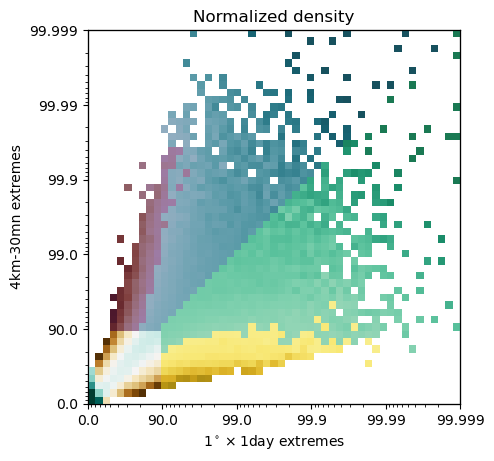

In [6]:
%matplotlib inline
jd.plot(branch=False)

Convective only
figure size = 15 3.25
Mostly convective
figure size = 15 3.25
Mostly mesoscale
figure size = 15 3.25
Mesoscale only
figure size = 15 3.25


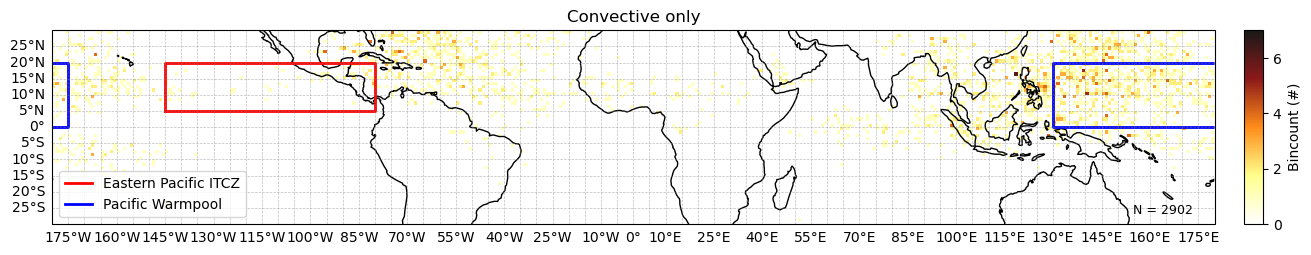

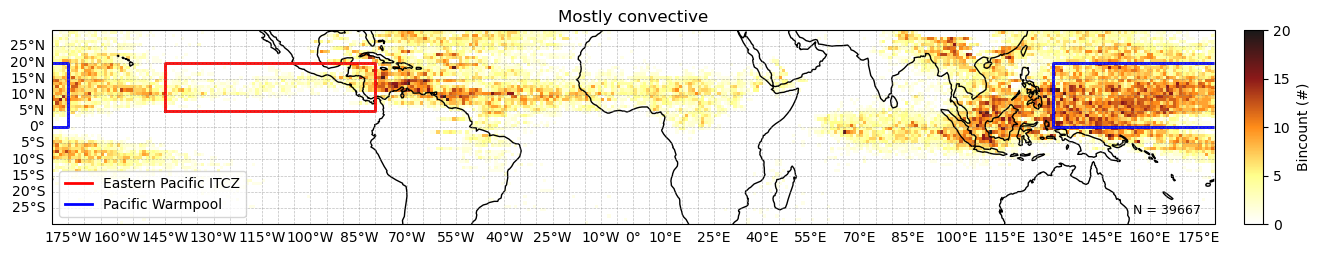

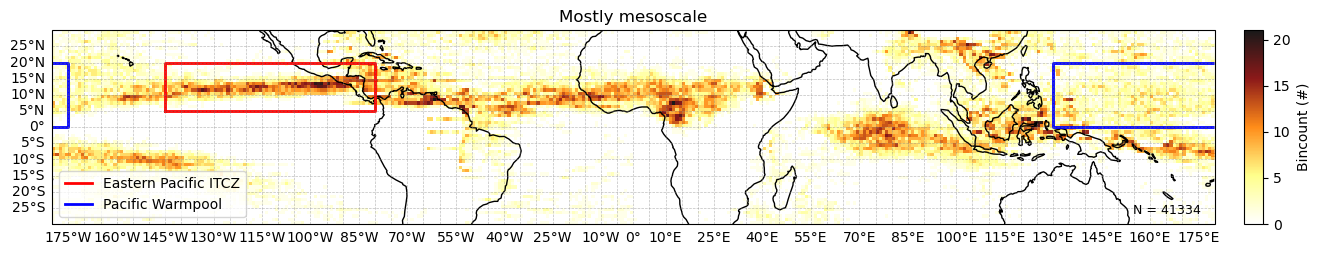

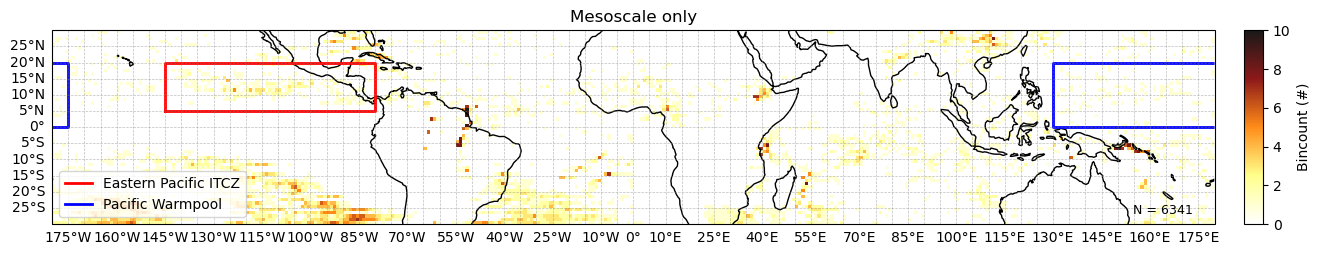

In [7]:
import cartopy.crs as ccrs
%matplotlib inline
# Show frequency maps of extremes in the 4 regions (normalized by total bincount in mask?)
jd.make_mask()

mask_all = jd.mask_branch1_90, jd.mask_coloc_c_90, jd.mask_coloc_ac_90, jd.mask_branch2_90
mask_names = 'Convective only','Mostly convective','Mostly mesoscale','Mesoscale only'
mask_labels = 'conv','mostlyconv','mostlyacc','acc'

for mask,mask_name,mask_label in zip(mask_all,mask_names,mask_labels):
    
    print(mask_name)
    mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask)
    ax = jd.make_map(mask_yxt)
    lon_min, lon_max = 215, 280 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 5, 20#gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='red', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Eastern Pacific ITCZ")
    lon_min, lon_max = 130, 185 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 0, 20#gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='blue', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Pacific Warmpool")
    ax.legend()
    
    ax.set_title(mask_name)

    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.pdf'%(mask_label)),bbox_inches='tight')
    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.png'%(mask_label)),bbox_inches='tight')

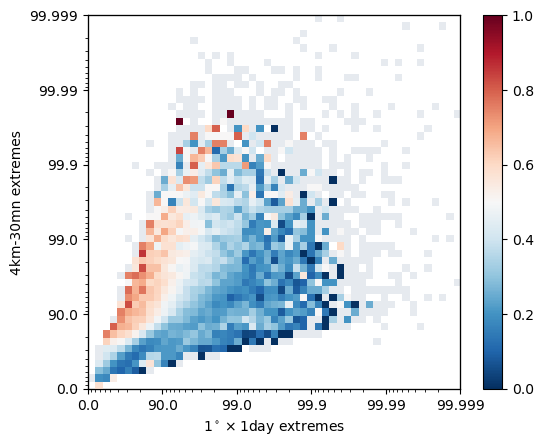

In [8]:
data, noise = jd.get_mcs_bin_fraction()
jd.plot_data(data, noise, branch=False)

In [9]:
# A_max = jd.storm_attributes_on_jdist(['surfmaxkm2_172Wm2'], ['max'])
# A_max = A_max[0][0,0]

In [10]:
# jd.plot_data(A_max, noise, cmap = plt.cm.viridis, branch=False)

In [11]:
# A_mean = jd.storm_attributes_on_jdist(['surfmaxkm2_172Wm2'], ['mean'])
# A_mean = A_mean[0][0,0]

In [12]:
# jd.plot_data(A_mean, noise, cmap = plt.cm.viridis, branch=False)

# MCS Growth rate computation

In [13]:
from tempest.storm_analysis import set_storm_growth_rate
for storm in jd.storms:
    set_storm_growth_rate(storm)

Optimization error: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Returning initial guess
Optimization error: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Returning initial guess
Optimization error: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Returning initial guess
Optimization error: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Returning initial guess
Optimization error: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Returning initial guess
Optimization error: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Returning initial guess
Optimization error: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Returning initial guess
Optimization error: Optimal parameters not found: Number of calls to function has reached maxfev 

In [14]:
mean_growth_rate = jd.storm_attributes_on_jdist(['growth_rate'], ['mean'])
max_growth_rate = jd.storm_attributes_on_jdist(['growth_rate'], ['max'])

0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495001234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

In [15]:
mean_growth_rate = mean_growth_rate[0][0,0,:,:]
max_growth_rate = max_growth_rate[0][0,0,:,:]

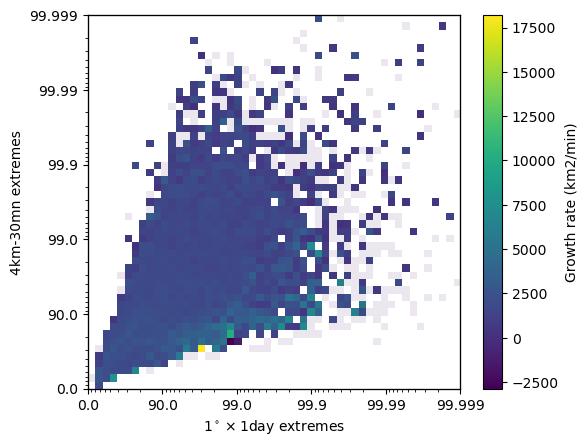

In [18]:
data = mean_growth_rate
jd.plot_data(data, noise, cmap = plt.cm.viridis, branch=False, label = 'Growth rate (km2/min)')

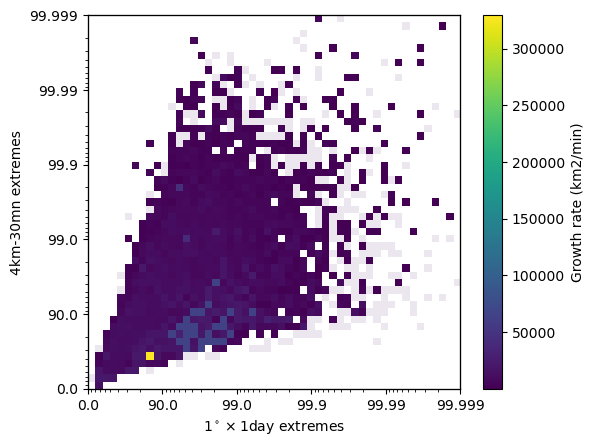

In [17]:
data = max_growth_rate
jd.plot_data(data, noise, cmap = plt.cm.viridis, branch=False, label = 'Growth rate (km2/min)')